In [13]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

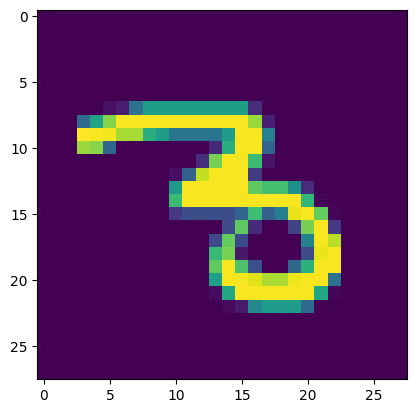

In [15]:
plt.imshow(x_train[30])

In [16]:
x_train[0].shape

(28, 28)

In [17]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [18]:
x_train[0].shape

(28, 28, 1)

In [19]:
y_train[30]

3

In [20]:
#one-hot encode target column
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [21]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [22]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 1455s 776ms/step - loss: 0.2363 - accuracy: 0.9542 - val_loss: 0.0833 - val_accuracy: 0.9735
Epoch 2/3
1875/1875 [==============================] - 788s 420ms/step - loss: 0.0673 - accuracy: 0.9797 - val_loss: 0.0818 - val_accuracy: 0.9774
Epoch 3/3
1875/1875 [==============================] - 169s 90ms/step - loss: 0.0479 - accuracy: 0.9844 - val_loss: 0.0737 - val_accuracy: 0.9787


In [25]:
#show prediction for 
model.predict(x_test[:4])

1/1 [==============================] - 0s 319ms/step


array([[3.8841666e-11, 8.7793608e-17, 2.0098204e-07, 4.1663698e-06,
        4.9108040e-15, 3.8148500e-14, 8.0767770e-14, 9.9999559e-01,
        8.1800695e-12, 4.2754080e-09],
       [6.9453872e-06, 3.0487063e-06, 9.7598857e-01, 1.2861785e-06,
        8.4455644e-11, 9.5114819e-11, 2.3996657e-02, 1.5207749e-13,
        3.5176536e-06, 2.2072526e-12],
       [3.9784219e-08, 9.9996495e-01, 9.0420565e-07, 1.2501765e-08,
        9.2828050e-06, 3.5873026e-07, 5.3571160e-08, 2.2289823e-06,
        2.2129119e-05, 4.4223616e-09],
       [1.0000000e+00, 1.4986259e-15, 2.8822108e-11, 2.9917658e-14,
        8.0684296e-12, 1.0673525e-12, 5.4207718e-09, 7.9020714e-12,
        1.0458471e-10, 4.8917816e-08]], dtype=float32)

In [26]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)